# Data Preparation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pal = 'deep'
st = 'whitegrid'
fig_size = {'figure.figsize':(10, 8)}

sns.set_theme(context='notebook',
              style= st,
              palette= pal,
              font='sans-serif',
              font_scale=1,
              color_codes=True,
              rc= fig_size)

In [3]:
df = pd.read_csv('../data/bd-recommendations.csv')

In [4]:
df.head()

,title,price,author,publisher,isbn,category,translator,pages,date,series,recommendations,bookstores,synopsis
0,Cambiare l'acqua ai fiori,18,Perrin Valérie,E/O,9788833570990,Letterature straniere: testi,Bracci Testasecca A.,476,10/07/2019,Dal mondo,63.0,"81/libreria-tasso, 60/a-tutto-libro, 55/libris...",\nTab Article\nViolette Toussaint è guardiana ...
1,"Ragazza, donna, altro",20,Evaristo Bernardine,Sur,9788869982279,Letterature straniere: testi,Testa M.,520,11/11/2020,BigSur,61.0,39/la-confraternita-delluva-libreria-indipende...,\nTab Article\nÈ una grande serata per Amma: u...
2,L'Ickabog,19,Rowling J. K.,Salani,9788831006705,Letteratura per ragazzi,Daniele V.,320,10/11/2020,NaN,44.0,"168/magia-del-fumetto, 486/lotta-libreria, 306...",\nTab Article\nC'era una volta un regno chiama...
3,Borgo Sud,18,Di Pietrantonio Donatella,Einaudi,9788806244781,Letteratura italiana: testi,NaN,168,03/11/2020,Supercoralli,36.0,"285/libreria-fogola-pisa, 512/libreria-di-donn...",\nTab Article\nÈ il momento più buio della not...
4,Dante,20,Barbero Alessandro,Laterza,9788858141649,Letteratura italiana: critica,NaN,361,08/10/2020,I Robinson,36.0,"51/il-ponte-sulla-dora, 116/lettera22, 433/lib...","\nTab Article\nDante è l'uomo su cui, per la f..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21014 entries, 0 to 21013
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            21014 non-null  object 
 1   price            21014 non-null  int64  
 2   author           19732 non-null  object 
 3   publisher        21014 non-null  object 
 4   isbn             21014 non-null  int64  
 5   category         20995 non-null  object 
 6   translator       7648 non-null   object 
 7   pages            20021 non-null  object 
 8   date             21014 non-null  object 
 9   series           16087 non-null  object 
 10  recommendations  20905 non-null  float64
 11  bookstores       20905 non-null  object 
 12  synopsis         20061 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.1+ MB


## Missing Values

In [6]:
df.isna().sum()

title                  0
price                  0
author              1282
publisher              0
isbn                   0
category              19
translator         13366
pages                993
date                   0
series              4927
recommendations      109
bookstores           109
synopsis             953
dtype: int64

In [7]:
df.drop(columns=['author','title','translator','series'], inplace=True)

In [8]:
df.dropna(subset=['category', 'bookstores', 'recommendations', 'synopsis'], inplace=True)

In [9]:
df['pages'] = pd.to_numeric(df['pages'],errors='coerce')
df.fillna({'pages': df['pages'].median()}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 0 to 21013
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            19945 non-null  int64  
 1   publisher        19945 non-null  object 
 2   isbn             19945 non-null  int64  
 3   category         19945 non-null  object 
 4   pages            19945 non-null  float64
 5   date             19945 non-null  object 
 6   recommendations  19945 non-null  float64
 7   bookstores       19945 non-null  object 
 8   synopsis         19945 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ MB


## Recommendations and Bookstores 

These 2 variables are strictly related, since _bookstore_ column is the list of bookstores that recommends that particular book.

In [11]:
df['recommendations'].describe()

count    19945.000000
mean         1.579093
std          1.877590
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         63.000000
Name: recommendations, dtype: float64

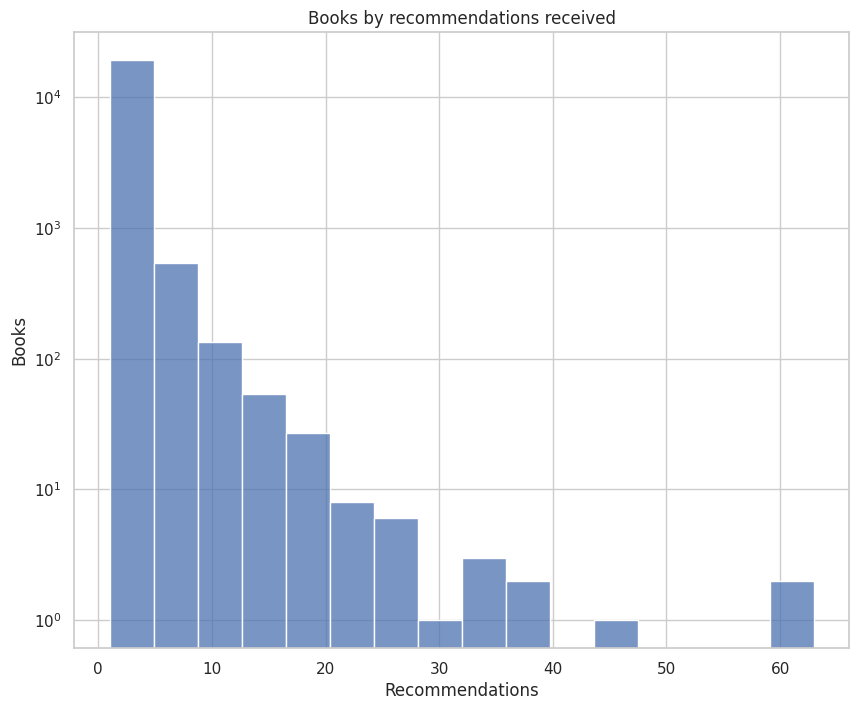

In [12]:
fig, ax = plt.subplots()
ax = sns.histplot(data=df, x='recommendations')
ax.set_xlabel('Recommendations')
ax.set_ylabel('Books')
ax.set_yscale('log')
ax.set_title('Books by recommendations received')
plt.show()

In [13]:
df['recommendations'].value_counts(normalize=True).sort_index()[:20]

1.0     0.760692
2.0     0.134169
3.0     0.045275
4.0     0.020657
5.0     0.011782
6.0     0.007671
7.0     0.004512
8.0     0.003259
9.0     0.002306
10.0    0.001705
11.0    0.001304
12.0    0.001454
13.0    0.000552
14.0    0.000902
15.0    0.000802
16.0    0.000451
17.0    0.000301
18.0    0.000501
19.0    0.000251
20.0    0.000301
Name: recommendations, dtype: float64

In [14]:
# Create nested list with bookstore list for every book
bookstores_by_book = [bookstores_in_book.split(', ') for bookstores_in_book in df['bookstores']]

In [15]:
# Get bookstore list
bookstores = list(set(bookstore for bookstores_in_book in bookstores_by_book 
    for bookstore in bookstores_in_book))

In [16]:
# Count recommendations done by bookstore
recommendations_by_bookstore = [sum(bookstores_in_book.count(bookstore)
    for bookstores_in_book in bookstores_by_book)
    for bookstore in bookstores]

Number of local bookstores: 527
Average number of recommendations by bookstore: 59.76280834914611
Median: 17.0
Std: 163.7306145429215


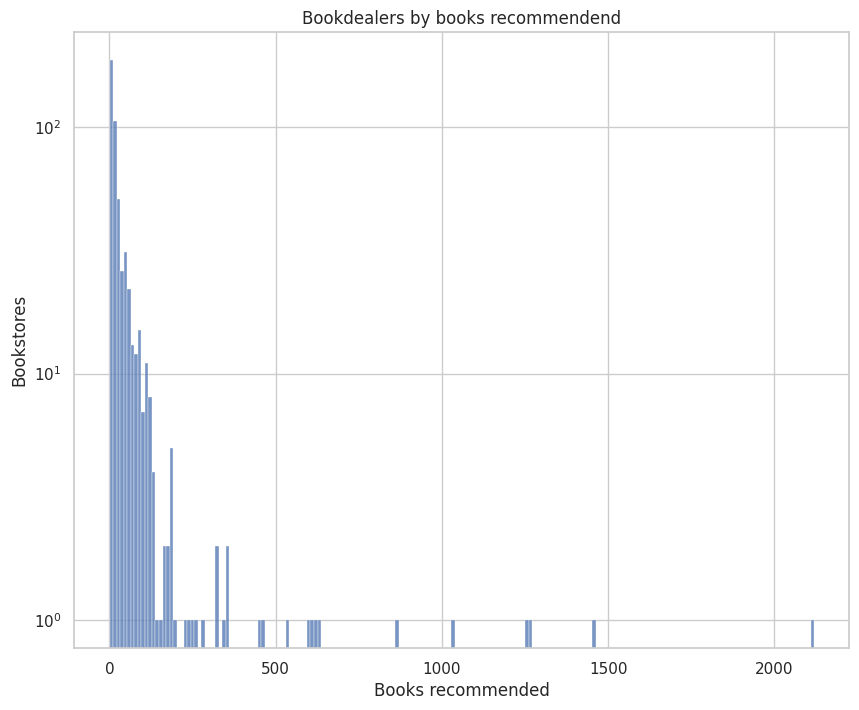

In [17]:
print(f'Number of local bookstores: {len(bookstores)}')
print(f'Average number of recommendations by bookstore: {np.mean(recommendations_by_bookstore)}')
print(f'Median: {np.median(recommendations_by_bookstore)}')
print(f'Std: {np.std(recommendations_by_bookstore)}')

fig, ax = plt.subplots()
ax = sns.histplot(recommendations_by_bookstore)
ax.set_xlabel('Books recommended')
ax.set_ylabel('Bookstores')
ax.set_yscale('log')
ax.set_title('Bookdealers by books recommendend')
plt.show()

In [18]:
pd.Series(recommendations_by_bookstore).value_counts(normalize=True).sort_index()[:20]

/tmp/ipykernel_37078/2709822038.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pd.Series(recommendations_by_bookstore).value_counts(normalize=True).sort_index()[:20]


1     0.047438
2     0.028463
3     0.032258
4     0.037951
5     0.026565
6     0.028463
7     0.036053
8     0.032258
9     0.026565
10    0.034156
11    0.022770
12    0.034156
13    0.036053
14    0.020873
15    0.018975
16    0.017078
17    0.020873
18    0.017078
19    0.009488
20    0.009488
dtype: float64

As for recommendations and bookstores, we are dealing with power law distributions. Outlier detection is not necessary. However, we should consider removing books that were recommended only once, by booksellers who made only that recommendation:

In [19]:
# Get bookstores that recommended only 1 book
bookstores1 = [bookstore[0] for bookstore in list(zip(bookstores, recommendations_by_bookstore)) if bookstore[1] ==1]

In [20]:
rows2remove = df[df['bookstores'].isin(bookstores1) & df['recommendations'] ==1].index

df.drop(index=rows2remove, inplace=True)

For now, _bookstores_ variable is just the list of bookstores that recommends that particular book. We can get the most from this variable using one hot encoding. 

In [21]:
df_one_hot = df['bookstores'].str.get_dummies(sep=', ')

In [22]:
df_one_hot.to_csv('../data/books-one-hot.csv', index=False)